In [1]:
import statsmodels
import scipy as sc
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Постановка
1) ЗП per hour  
2) Опыт работы   
3) education years  
4) Привлекательность  
5) бинарные признаки
Влияние привлекательности на ЗП  

In [3]:
raw = pd.read_csv("./data/beauty.csv", sep=";", index_col=False)

In [4]:
raw.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


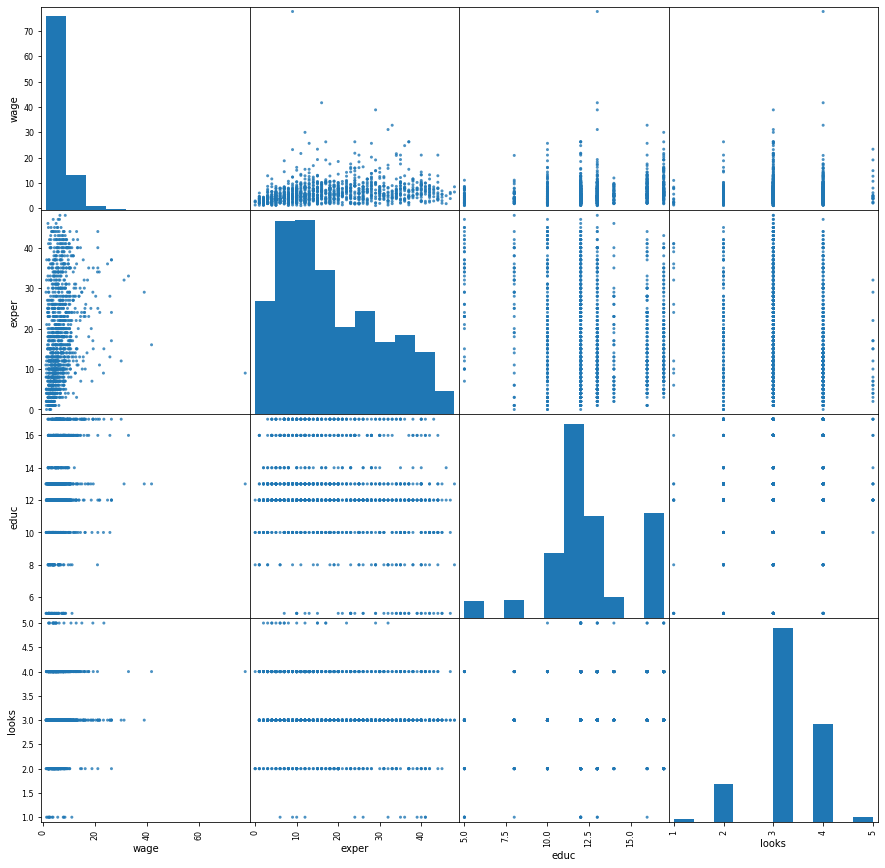

In [5]:
pd.plotting.scatter_matrix(raw[["wage", "exper", "educ", "looks"]], alpha=.8, figsize=(15, 15), diagonal="hist");

In [6]:
print(raw.union.value_counts())
print(raw.goodhlth.value_counts())
print(raw.black.value_counts())
print(raw.female.value_counts())
print(raw.married.value_counts())
print(raw.service.value_counts())

0    917
1    343
Name: union, dtype: int64
1    1176
0      84
Name: goodhlth, dtype: int64
0    1167
1      93
Name: black, dtype: int64
0    824
1    436
Name: female, dtype: int64
1    871
0    389
Name: married, dtype: int64
0    915
1    345
Name: service, dtype: int64


### Предобработка

In [7]:
data = raw

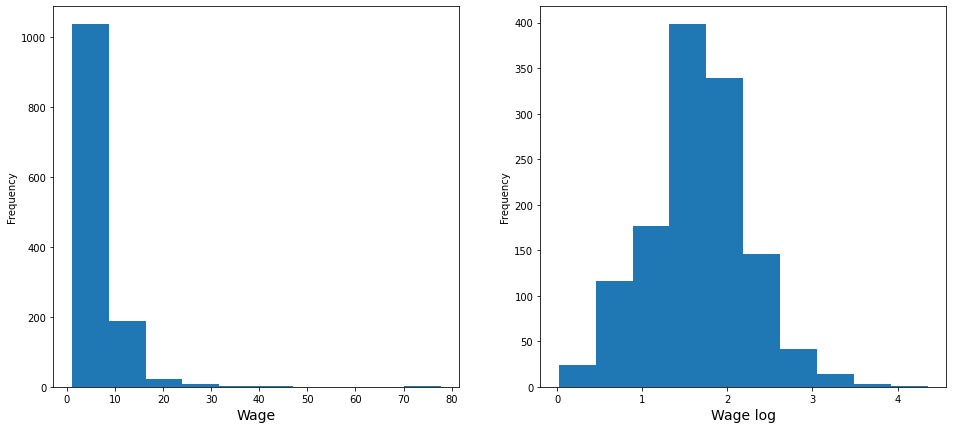

In [22]:
plt.figure(figsize(16, 7))
plt.subplot(1, 2, 1)
data["wage"].plot(kind="hist")
plt.xlabel("Wage", fontsize=14)

plt.subplot(1, 2, 2)
np.log(data["wage"]).plot(kind="hist")
plt.xlabel("Wage log", fontsize=14);
pylab.show()

Удалим человека, получающего > 70 $ в час

In [25]:
data = data[data["wage"] < 77]

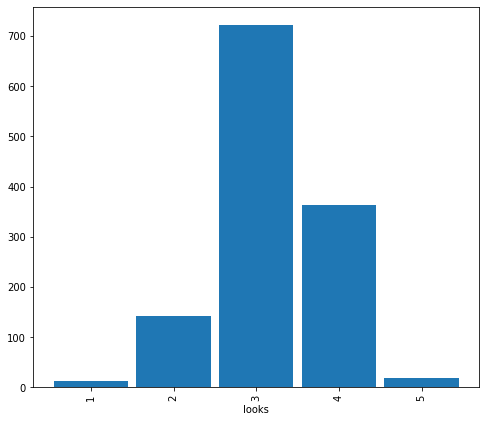

In [33]:
plt.figure(figsize(8, 7))
data.groupby("looks").looks.agg(lambda x: len(x)).plot(kind="bar", width=.9);

Превратим признак looks в категориальный и закодируем с помощью фиктивных переменных (1, 5 мало наблюдений)

In [40]:
data["belowavg"] = data["looks"].apply(lambda x: 1 if x < 3 else 0)
data["aboveavg"] = data["looks"].apply(lambda x: 1 if x > 3 else 0)
data.drop(["looks"], axis=1, inplace=True)

KeyError: 'looks'

In [42]:
data

,wage,exper,union,goodhlth,black,female,married,service,educ,belowavg,aboveavg
0,5.73,30,0,1,0,1,1,1,14,0,1
1,4.28,28,0,1,0,1,1,0,12,0,0
2,7.96,35,0,1,0,1,0,0,10,0,1
3,11.57,38,0,1,0,0,1,1,16,0,0
4,11.42,27,0,1,0,0,1,0,16,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1255,1.61,25,0,1,1,1,0,1,12,0,0
1256,1.68,4,0,1,0,1,1,1,12,1,0
1257,3.29,35,0,1,1,1,0,1,12,0,0
1258,2.31,15,0,1,1,1,1,1,10,0,0


## Построение модели

### Простейшая модель

In [43]:
ml = smf.ols("wage ~ exper + union + goodhlth + black + female + married + service + educ + belowavg + aboveavg", data=data)
fitted = ml.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     44.31
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           1.42e-75
Time:                        20:23:42   Log-Likelihood:                -3402.9
No. Observations:                1259   AIC:                             6828.
Df Residuals:                    1248   BIC:                             6884.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5898      0.743     -0.793      0.4

A:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


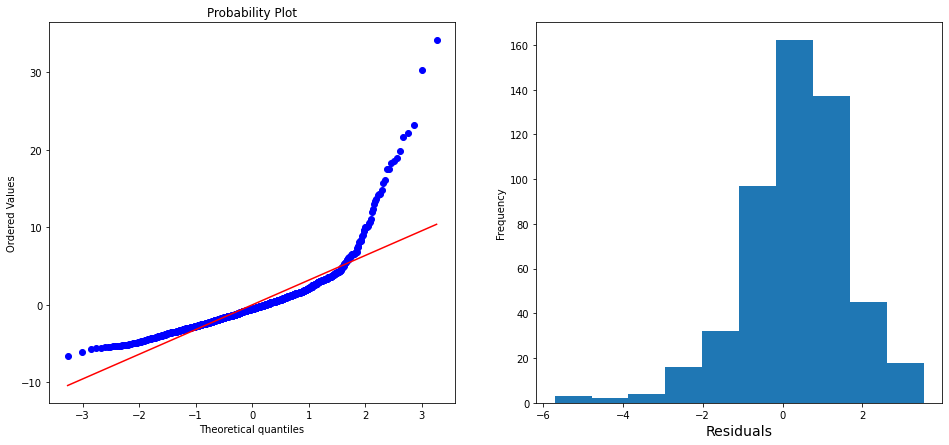

In [50]:
plt.figure(figsize(16, 7))
plt.subplot(1, 2, 1)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)

plt.subplot(1, 2, 2)
np.log(fitted.resid).plot.hist()
plt.xlabel("Residuals", fontsize=14)
pylab.show();

Оно скошенное, как и исходный признак. От регрессии исходного признака к регрессии логарифма

In [53]:
m2 = smf.ols("np.log(wage) ~ exper + union + goodhlth + black + female + married + service + educ + belowavg + aboveavg", data=data)
fitted = m2.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     77.63
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          1.18e-123
Time:                        20:36:50   Log-Likelihood:                -816.90
No. Observations:                1259   AIC:                             1656.
Df Residuals:                    1248   BIC:                             1712.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4515      0.095      4.737      0.0

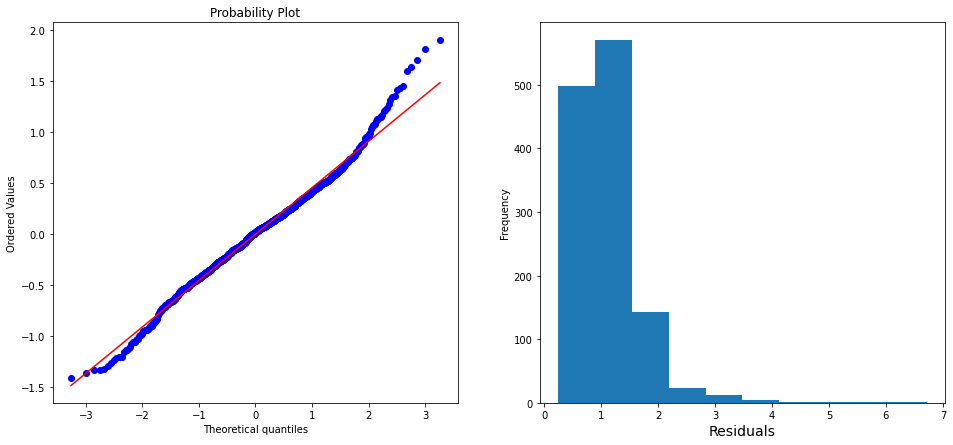

In [60]:
plt.figure(figsize(16, 7))
plt.subplot(1, 2, 1)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)

plt.subplot(1, 2, 2)
np.exp(fitted.resid).plot.hist()
plt.xlabel("Residuals", fontsize=14)
pylab.show();

Зависимость остатков от непрерывных признаков

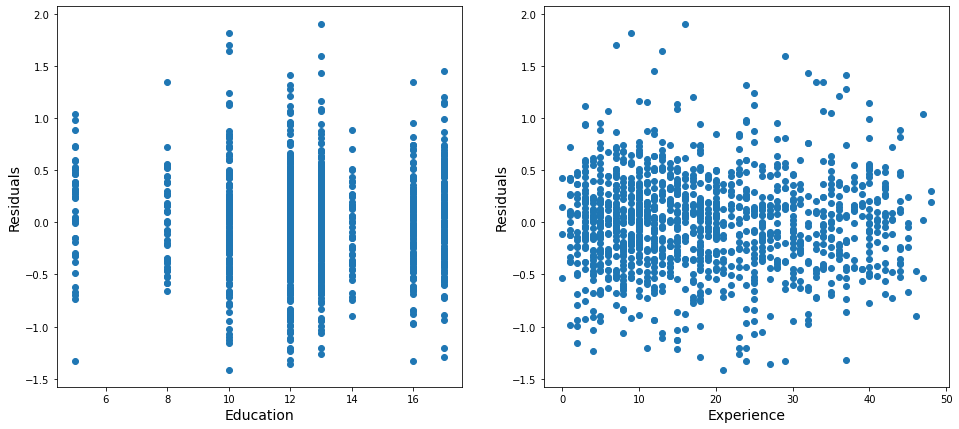

In [62]:
plt.figure(figsize(16, 7))
plt.subplot(121)
scatter(data["educ"], fitted.resid)
plt.xlabel("Education", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.subplot(122)
scatter(data["exper"], fitted.resid)
plt.xlabel("Experience", fontsize=14)
plt.ylabel("Residuals", fontsize=14);

Кажется, что точки лежат как дуге? Присутствует квадратичная зависимость

### Добавляем квадрат опыта работы

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     76.46
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          3.19e-131
Time:                        20:52:38   Log-Likelihood:                -796.86
No. Observations:                1259   AIC:                             1618.
Df Residuals:                    1247   BIC:                             1679.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3424      0

Text(0, 0.5, 'Residuals')

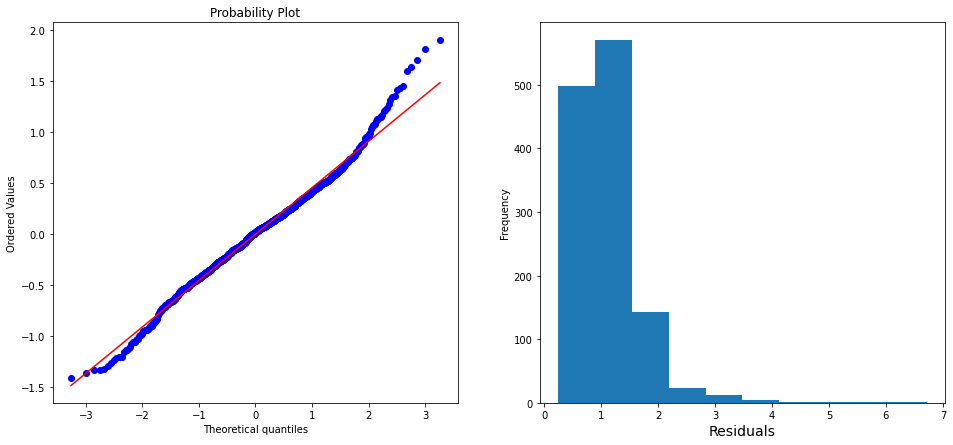

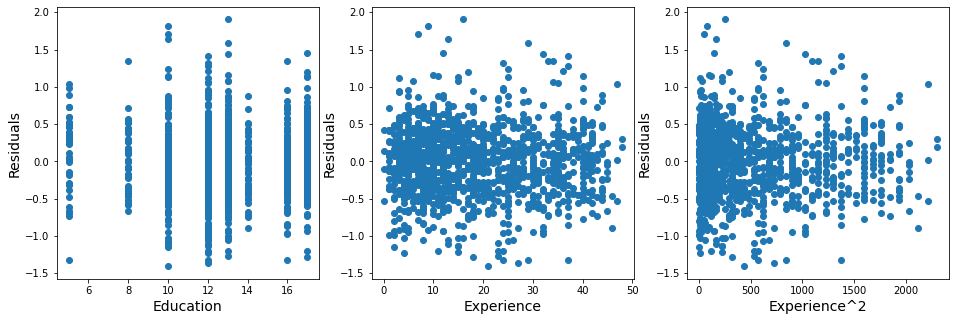

In [61]:
m3 = smf.ols("np.log(wage) ~ exper + np.power(exper, 2) + union + goodhlth + black + female + married + service + educ + belowavg + aboveavg", data=data)
fitted = m3.fit()
print(fitted.summary())

plt.figure(figsize(16, 7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)
plt.subplot(122)
np.exp(fitted.resid).plot.hist()
plt.xlabel("Residuals", fontsize=14)
plt.figure(figsize(16, 5))
plt.subplot(131)
scatter(data["educ"], fitted.resid)
plt.xlabel("Education", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.subplot(132)
scatter(data["exper"], fitted.resid)
plt.xlabel("Experience", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.subplot(133)
scatter(data["exper"] ** 2, fitted.resid)
plt.xlabel("Experience^2", fontsize=14)
plt.ylabel("Residuals", fontsize=14)

Критерий Бройша-Пагана для проверки гомоскедастичности ошибкок:

In [71]:
sms.het_breuschpagan(fitted.resid, fitted.model.exog)[1]

4.192584368287331e-06

Ошибки гетероскедастичны, значимость признаков может определяться неверно. Сделаем поправку Уайта.

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     87.29
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          4.23e-146
Time:                        22:04:43   Log-Likelihood:                -796.86
No. Observations:                1259   AIC:                             1618.
Df Residuals:                    1247   BIC:                             1679.
Df Model:                          11                                         
Covariance Type:                  HC1                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3424      0

Text(0, 0.5, 'Residuals')

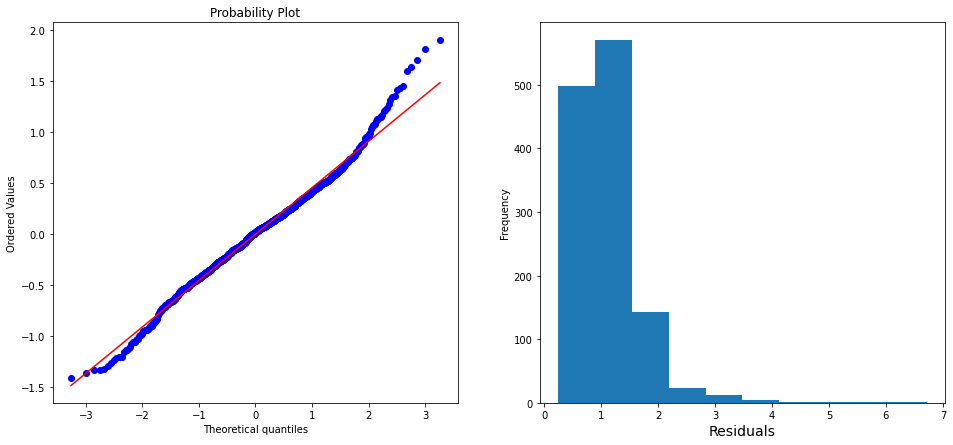

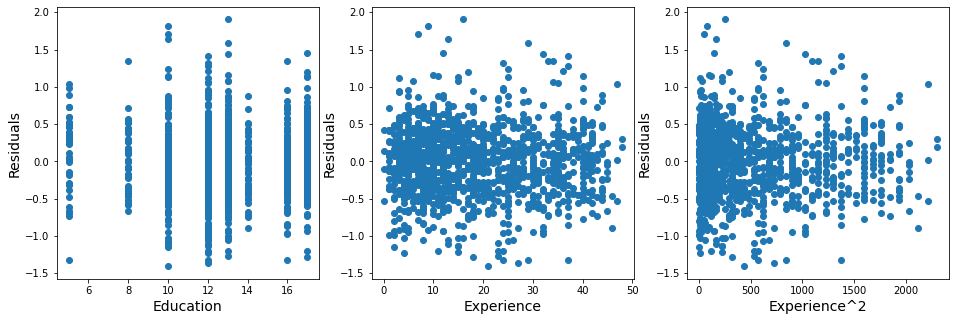

In [81]:
m4 = smf.ols("np.log(wage) ~ exper + np.power(exper, 2) + union + goodhlth + black + female + married + service + educ + belowavg + aboveavg", data=data)
fitted = m4.fit(cov_type="HC1")
print(fitted.summary())

plt.figure(figsize(16, 7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)
plt.subplot(122)
np.exp(fitted.resid).plot.hist()
plt.xlabel("Residuals", fontsize=14)
plt.figure(figsize(16, 5))
plt.subplot(131)
scatter(data["educ"], fitted.resid)
plt.xlabel("Education", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.subplot(132)
scatter(data["exper"], fitted.resid)
plt.xlabel("Experience", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.subplot(133)
scatter(data["exper"] ** 2, fitted.resid)
plt.xlabel("Experience^2", fontsize=14)
plt.ylabel("Residuals", fontsize=14)

Гетероскедостичность не слишком сильная, поскольку мы получили практически идентичные модели

### Удаляем незначимые признаки

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     121.1
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          6.49e-150
Time:                        22:32:28   Log-Likelihood:                -799.30
No. Observations:                1259   AIC:                             1617.
Df Residuals:                    1250   BIC:                             1663.
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3906      0

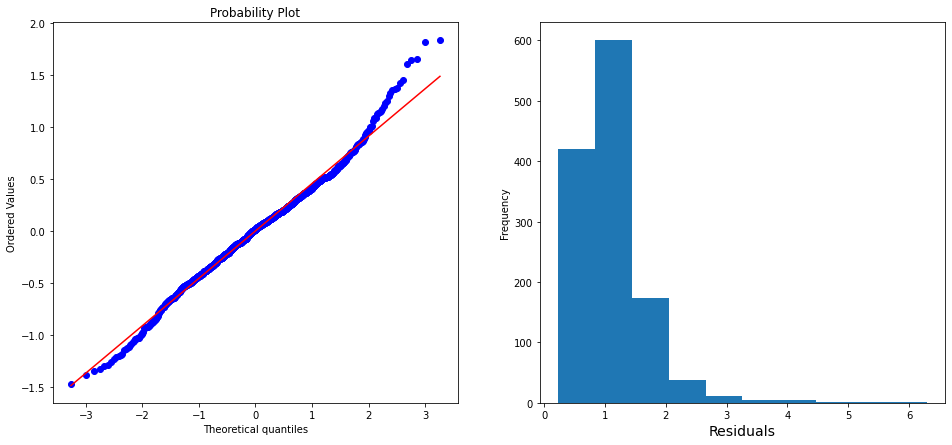

In [157]:
m5 = smf.ols("np.log(wage) ~ exper + np.power(exper, 2) + union + female + service + educ + belowavg + aboveavg", data=data)
fitted = m5.fit(cov_type="HC1")
print(fitted.summary())

plt.figure(figsize(16, 7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)
plt.subplot(122)
np.exp(fitted.resid).plot.hist()
plt.xlabel("Residuals", fontsize=14);

Посмотрим на качество модели при помощи критерия Фишера

In [88]:
print("F={}, p={}, k1={}".format(*m4.fit().compare_f_test(m5.fit()))) # большая, затем меньшая, отдельный тест (не лекции)

F=1.611478111622443, p=0.18491067300763842, k1=3.0


Проверим на наблюдения, слишком сильно влияющие на регрессионное уравнение

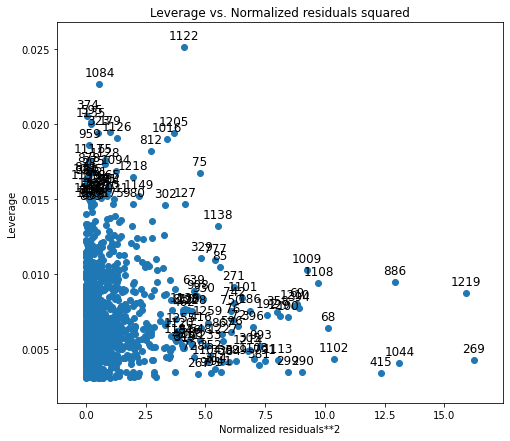

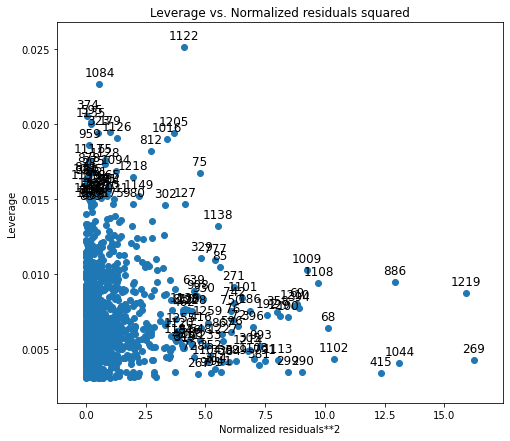

In [95]:
plot_leverage_resid2(fitted)

In [100]:
data.loc[[1122]]

,wage,exper,union,goodhlth,black,female,married,service,educ,belowavg,aboveavg
1122,6.25,47,0,0,1,1,1,0,5,0,1


In [101]:
data.loc[[269]]

,wage,exper,union,goodhlth,black,female,married,service,educ,belowavg,aboveavg
269,41.67,16,0,0,0,0,1,0,13,0,1


## Выводы

Итоговая модель объясняет 40% вариации логарифма отклика

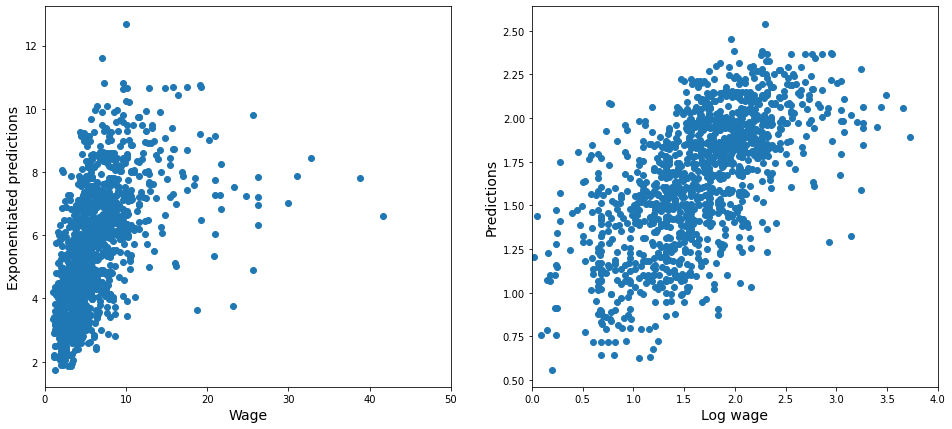

In [158]:
plt.figure(figsize(16, 7))
plt.subplot(121)
scatter(data["wage"], np.exp(fitted.fittedvalues))
plt.xlabel("Wage", fontsize=14)
plt.ylabel("Exponentiated predictions", fontsize=14)
plt.xlim([0, 50])

plt.subplot(122)
scatter(np.log(data["wage"]), fitted.fittedvalues)
plt.xlabel("Log wage", fontsize=14)
plt.ylabel("Predictions", fontsize=14)
plt.xlim([0, 4]);